<a href="https://www.kaggle.com/code/surajthakur21/k-means-clustering?scriptVersionId=216116103" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-iq-cqpa/student_clustering.csv


In [2]:
df = pd.read_csv("/kaggle/input/students-iq-cqpa/student_clustering.csv")

In [3]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

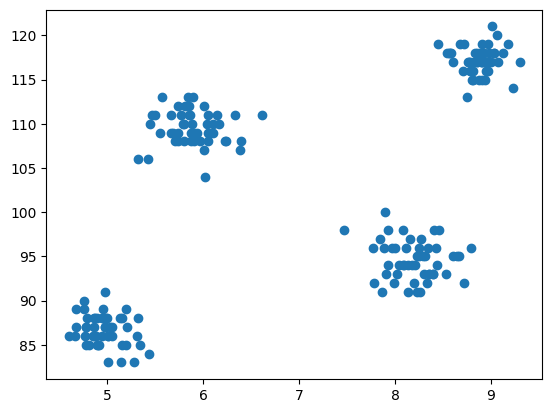

In [5]:
plt.scatter(df['cgpa'],df['iq'])

In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [8]:
wcss

[29957.898288,
 4184.14127,
 2362.713349,
 681.96966,
 514.1616803171114,
 388.8524026875981,
 309.76168443979316,
 233.54082485509016,
 206.72239593998563,
 178.88412378438554]

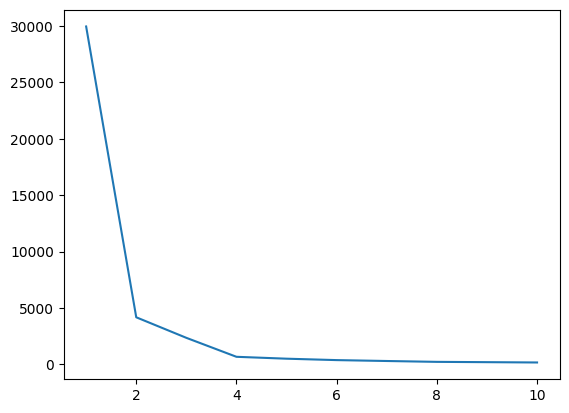

In [9]:
plt.plot(range(1,11),wcss)

In [10]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
y_means

array([1, 0, 3, 3, 0, 0, 3, 2, 0, 3, 1, 0, 3, 1, 0, 3, 0, 3, 0, 0, 3, 1,
       3, 1, 1, 3, 1, 2, 3, 0, 2, 0, 2, 0, 3, 3, 2, 0, 1, 0, 1, 3, 3, 1,
       2, 2, 3, 0, 2, 0, 1, 1, 2, 3, 2, 0, 0, 2, 0, 2, 0, 3, 3, 2, 1, 2,
       3, 1, 0, 3, 0, 2, 3, 1, 0, 2, 0, 2, 1, 3, 3, 2, 0, 1, 2, 1, 2, 0,
       2, 0, 2, 2, 3, 1, 3, 3, 2, 3, 1, 2, 0, 1, 1, 2, 1, 1, 3, 1, 2, 2,
       3, 2, 0, 0, 3, 2, 3, 0, 2, 1, 1, 0, 3, 2, 3, 1, 3, 0, 1, 3, 3, 0,
       1, 1, 0, 2, 0, 1, 3, 3, 3, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 2,
       1, 3, 0, 2, 0, 3, 1, 2, 0, 3, 2, 1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 3,
       2, 0, 1, 2, 2, 0, 0, 0, 3, 1, 3, 3, 2, 0, 3, 3, 1, 1, 3, 1, 2, 0,
       0, 2], dtype=int32)

In [12]:
X[y_means == 3,1]

array([ 93.,  97.,  98.,  94.,  97.,  95.,  91.,  98.,  92.,  98.,  94.,
        96.,  96.,  96.,  93.,  94.,  96.,  96.,  95.,  93.,  95.,  94.,
        92.,  91.,  92.,  95.,  94.,  95.,  92.,  94.,  91.,  95.,  93.,
        97.,  98.,  96.,  93., 100.,  96.,  94.,  95.,  93.,  92.,  98.,
        96.,  93.,  91.,  93.,  94.,  96.])

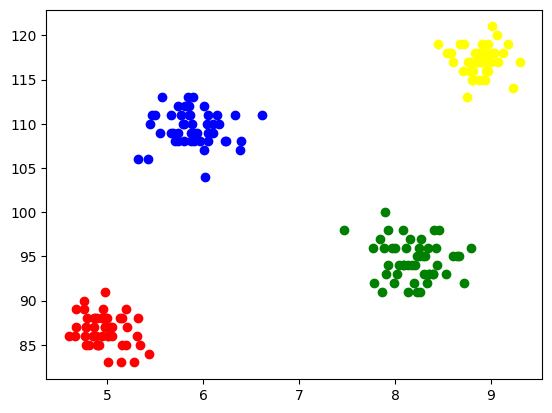

In [13]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='yellow')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='green')

# K-Means on 3D data

In [14]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [15]:
X

array([[ 5.80186103,  5.0465673 , -5.18656977],
       [ 5.16938243,  5.74055645, -5.9537006 ],
       [-4.95778625, -4.41718479,  3.89938082],
       [-5.69166075, -5.39675353,  4.3128273 ],
       [ 2.22744124, -2.18645228,  4.50318481],
       [-3.89662042,  1.63868364, -3.32528847],
       [ 6.96710175,  3.14201814, -3.76383597],
       [ 5.31515939,  5.84616065, -5.85951594],
       [-5.93576943, -5.26788808,  5.53035547],
       [-2.55682448,  2.99233656, -4.68067814],
       [ 4.32400562, -3.06230543,  5.95487808],
       [ 3.32529684, -1.51366481,  4.2135339 ],
       [-1.88146087,  2.05682807, -2.18946509],
       [ 4.40148689,  0.02832571,  3.75136522],
       [ 5.05880554, -2.3905973 ,  2.7802556 ],
       [-4.02568032,  3.29502609, -4.37443832],
       [-5.293085  ,  4.43752881, -3.63366799],
       [-2.23753255,  2.7764993 , -4.7332716 ],
       [ 3.62910158, -0.8830504 ,  4.50274088],
       [-3.25518824, -5.7612069 ,  5.3190391 ],
       [ 3.54366899, -2.72631424,  5.331

In [16]:
import plotly.express as px

fig = px.scatter_3d(x=X[:,0],y=X[:,1],z=X[:,2])
fig.show()

In [17]:
wcss = []

for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

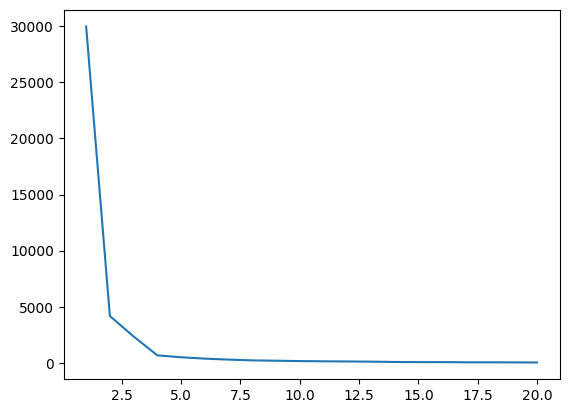

In [18]:
plt.plot(range(1,21),wcss)

In [19]:
wcss

[29957.898288,
 4184.14127,
 2362.713349,
 681.96966,
 514.1616803171114,
 388.8524026875981,
 302.6534993582081,
 234.4868734319922,
 204.4170171706271,
 171.5671635674366,
 153.4616442455412,
 136.62386466611193,
 119.75817734077933,
 93.12633999140564,
 79.41872449205121,
 80.1936448471055,
 65.21998155123384,
 61.66309208087233,
 55.72706135523506,
 47.366563037240546]

In [20]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [21]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [22]:
fig = px.scatter_3d(df,x='col1',y='col2',z='col3',color='label')
fig.show()